# Problem Statement  
**Customer Segmentation Analysis:**  

Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases, this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.  

You own the mall and want to understand the customers who can be easily converted **[Target Customers]** so that insights can be given to the marketing team and strategy can be planned accordingly.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers (1).csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization & EDA

In [7]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0, 0.5, 'Count')

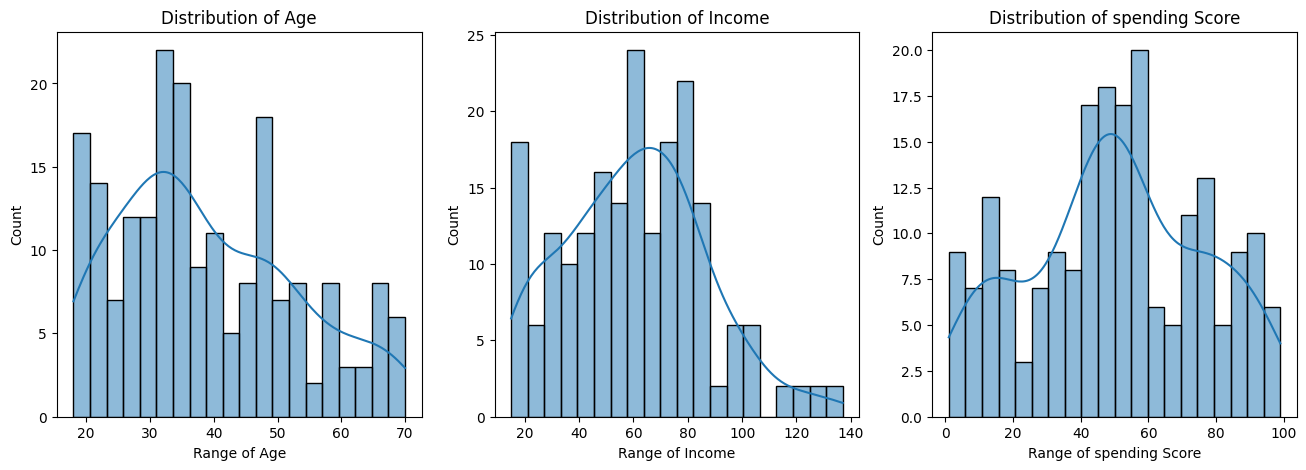

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(dataset['Age'],kde=True , bins=20)
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.histplot(dataset['Annual Income (k$)'],kde=True , bins=20)
plt.title('Distribution of Income')
plt.xlabel('Range of Income')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.histplot(dataset['Spending Score (1-100)'],kde=True , bins=20)
plt.title('Distribution of spending Score')
plt.xlabel('Range of spending Score')
plt.ylabel('Count')

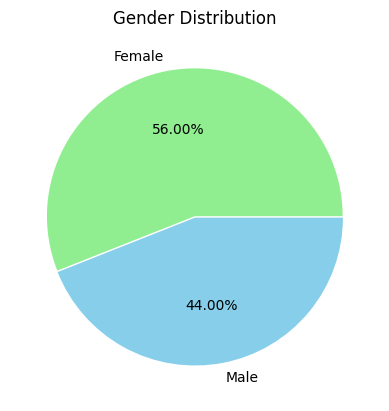

In [9]:
df=dataset.groupby('Gender').size()

df.plot(kind='pie',subplots=True,
        colors=['lightgreen','skyblue'],
        explode=[0, 0.01],
        autopct='%.2f%%')
plt.title('Gender Distribution')
plt.ylabel("")
plt.show()

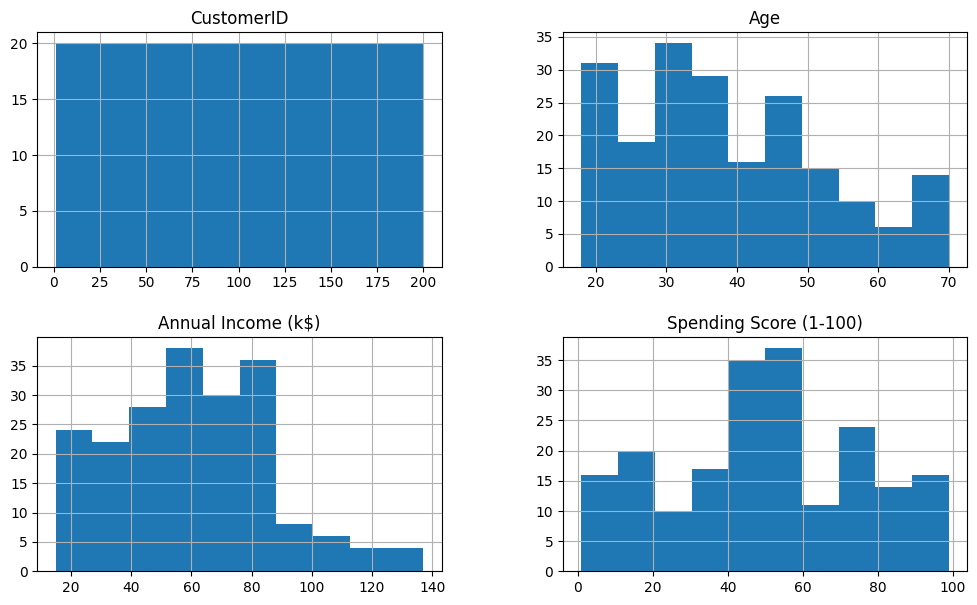

In [10]:
dataset.hist(figsize=(12,7))
plt.show()

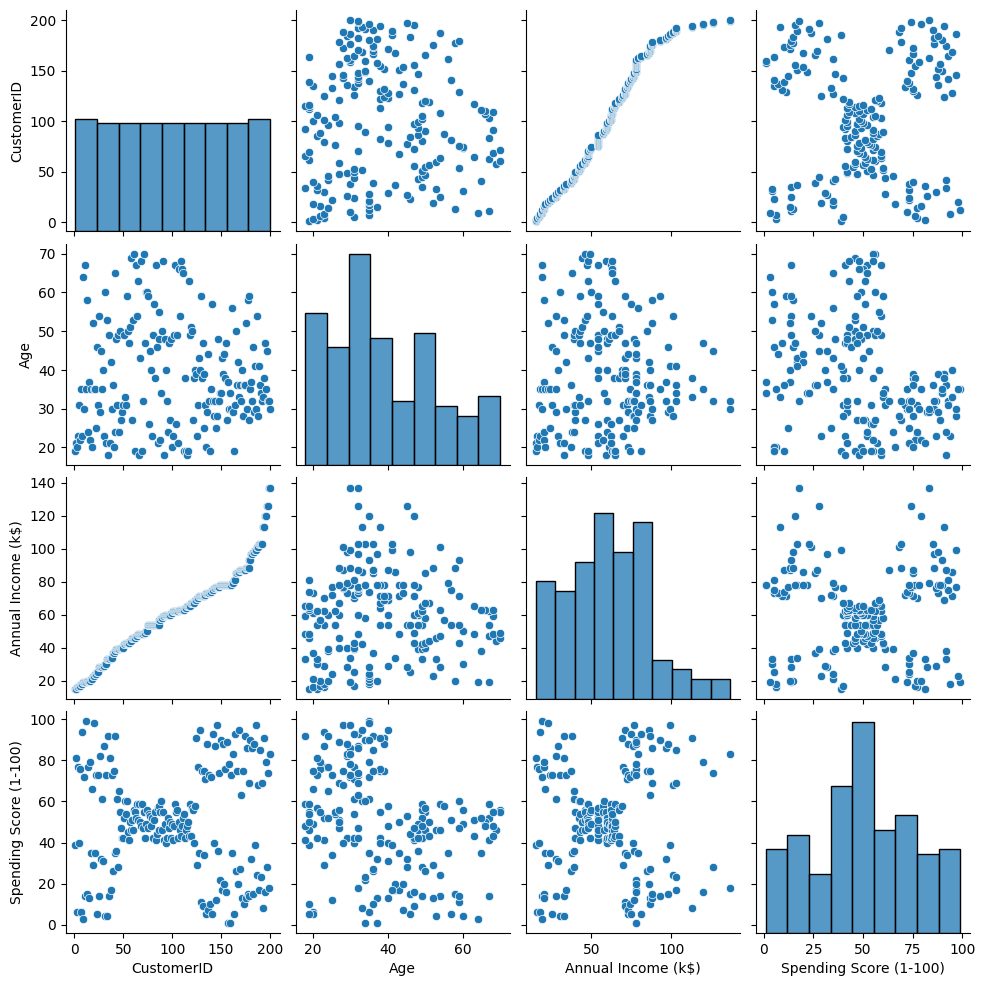

In [11]:
sns.pairplot(dataset)
plt.show()

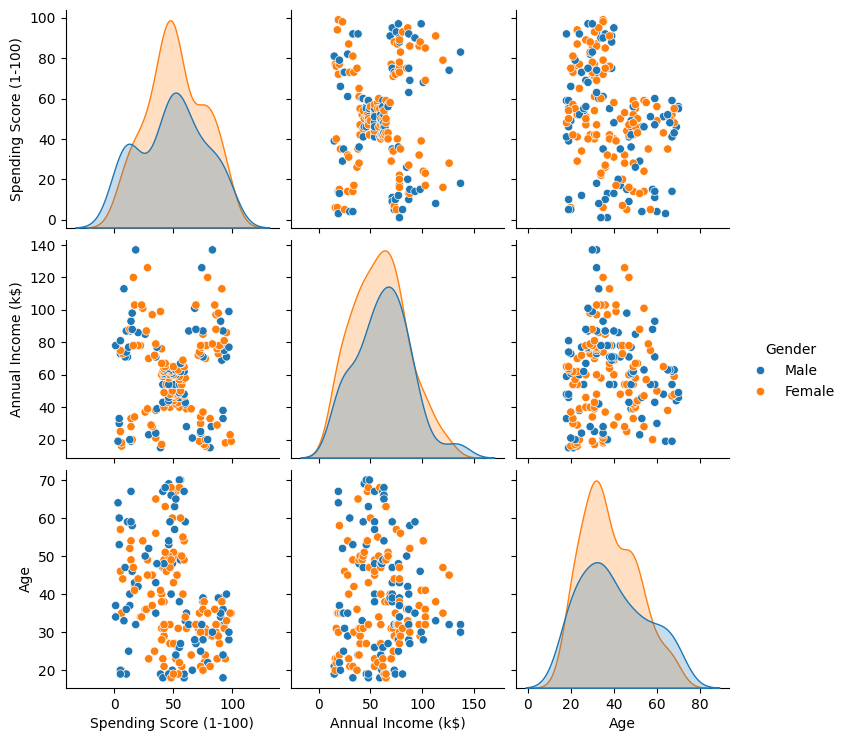

In [12]:
sns.pairplot(dataset, vars=['Spending Score (1-100)','Annual Income (k$)','Age'],hue='Gender')

Text(0.5, 1.0, 'Distribustion of Age')

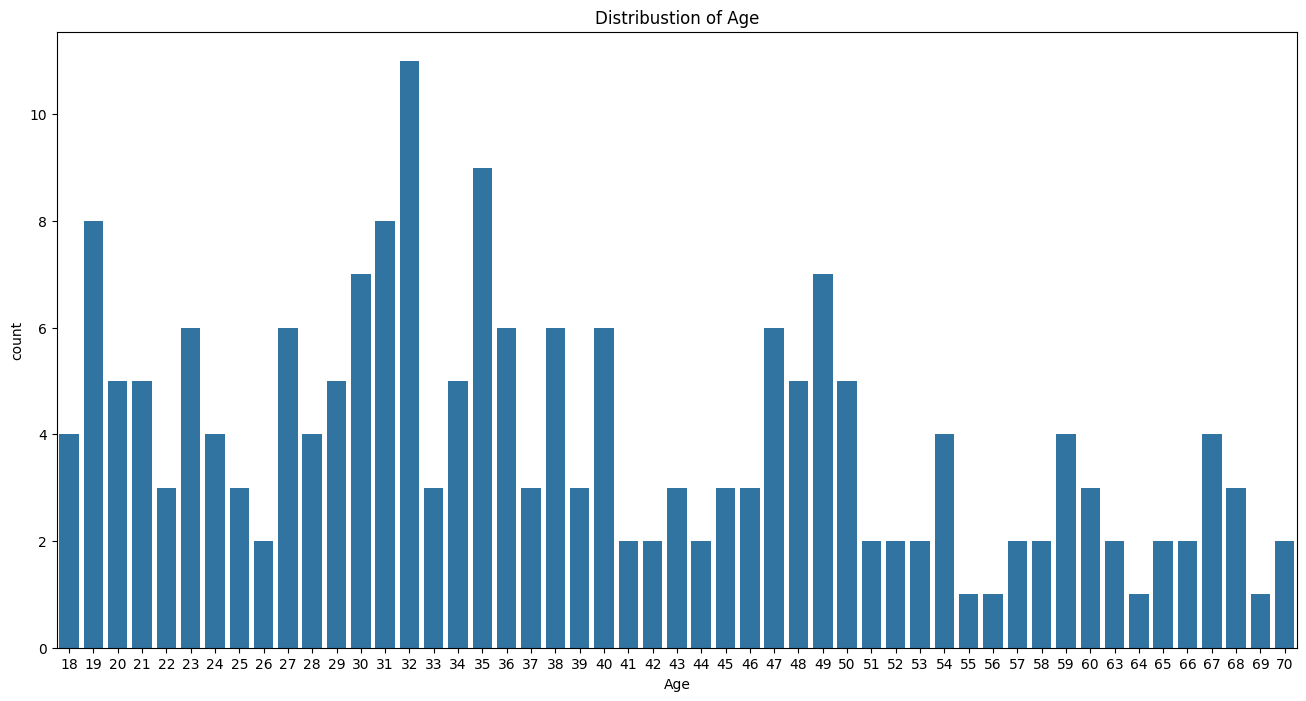

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x=dataset['Age'])
plt.title('Distribustion of Age')

Text(0.5, 1.0, 'Distribustion of Annual Income (k$)')

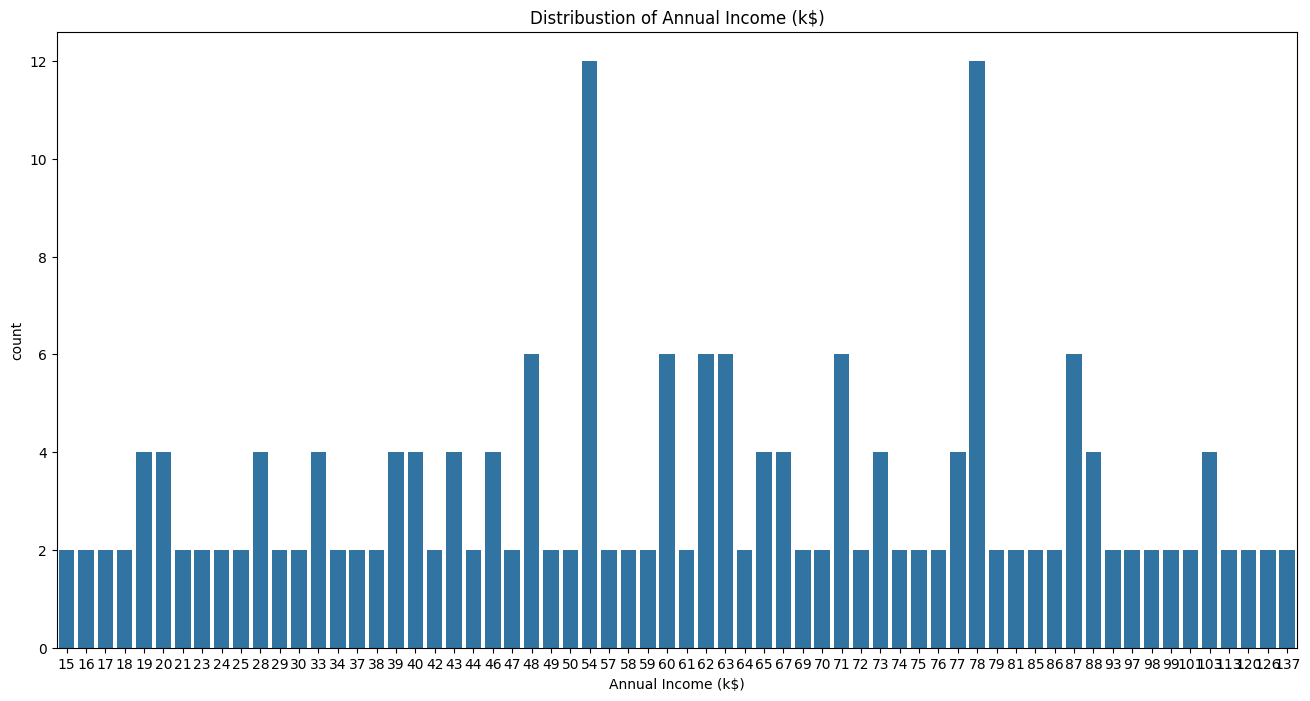

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x=dataset['Annual Income (k$)'])
plt.title('Distribustion of Annual Income (k$)')

Text(0.5, 1.0, 'Distribustion ofSpending Score (1-100)')

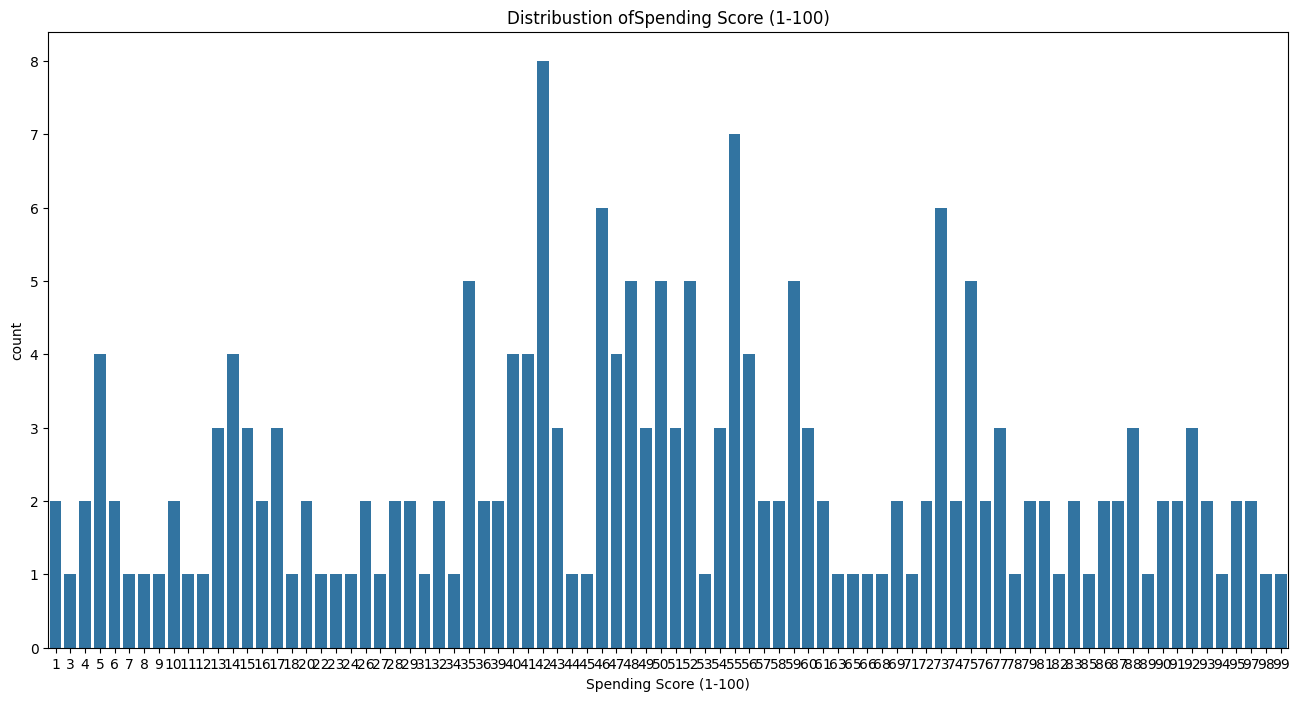

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x=dataset['Spending Score (1-100)'])
plt.title('Distribustion ofSpending Score (1-100)')

Target looks like regression


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.41E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

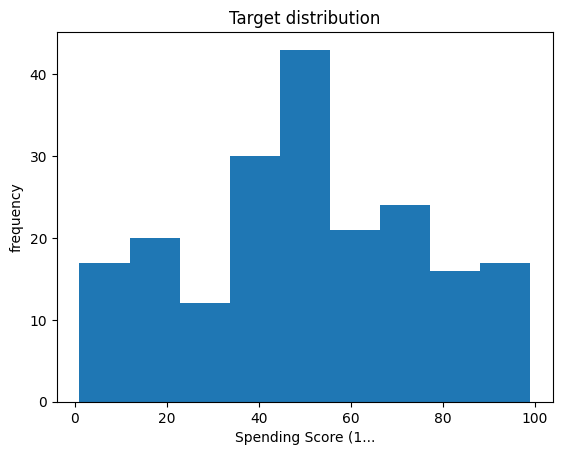

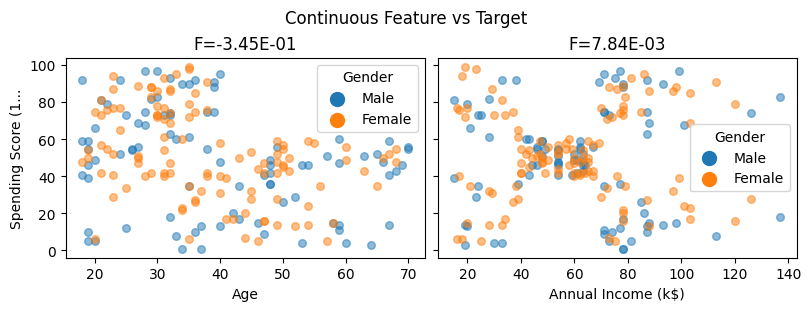

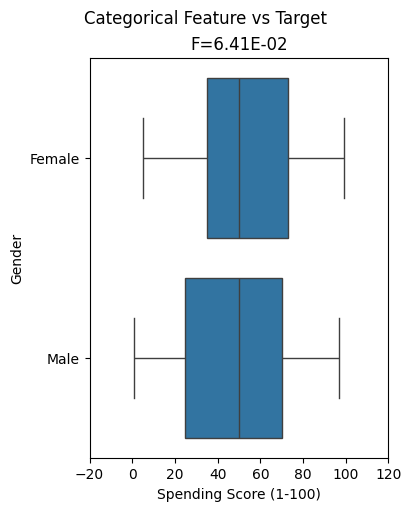

In [24]:
import dabl 
dabl.plot(dataset, target_col='Spending Score (1-100)')

Target looks like regression


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=1.64E-02'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

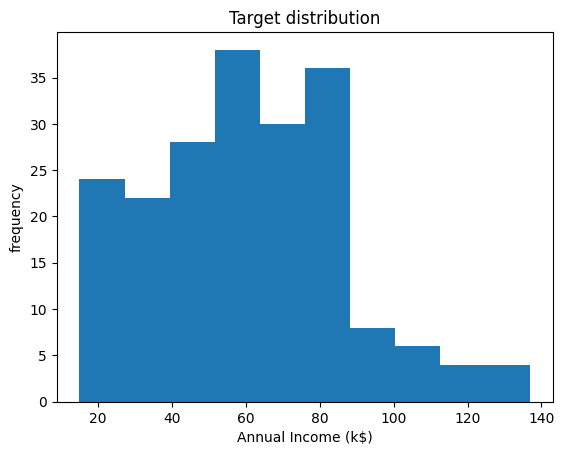

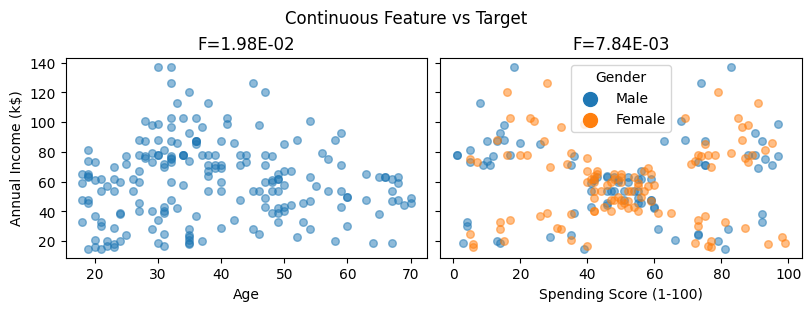

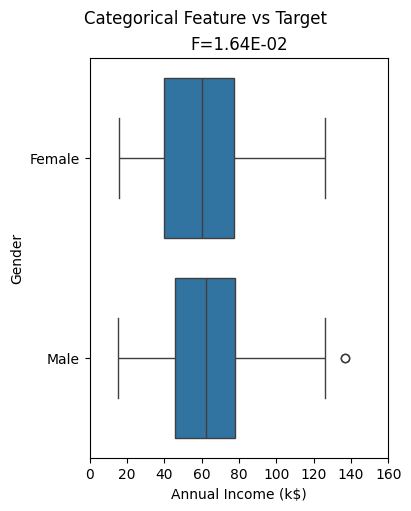

In [25]:
dabl.plot(dataset, target_col='Annual Income (k$)')

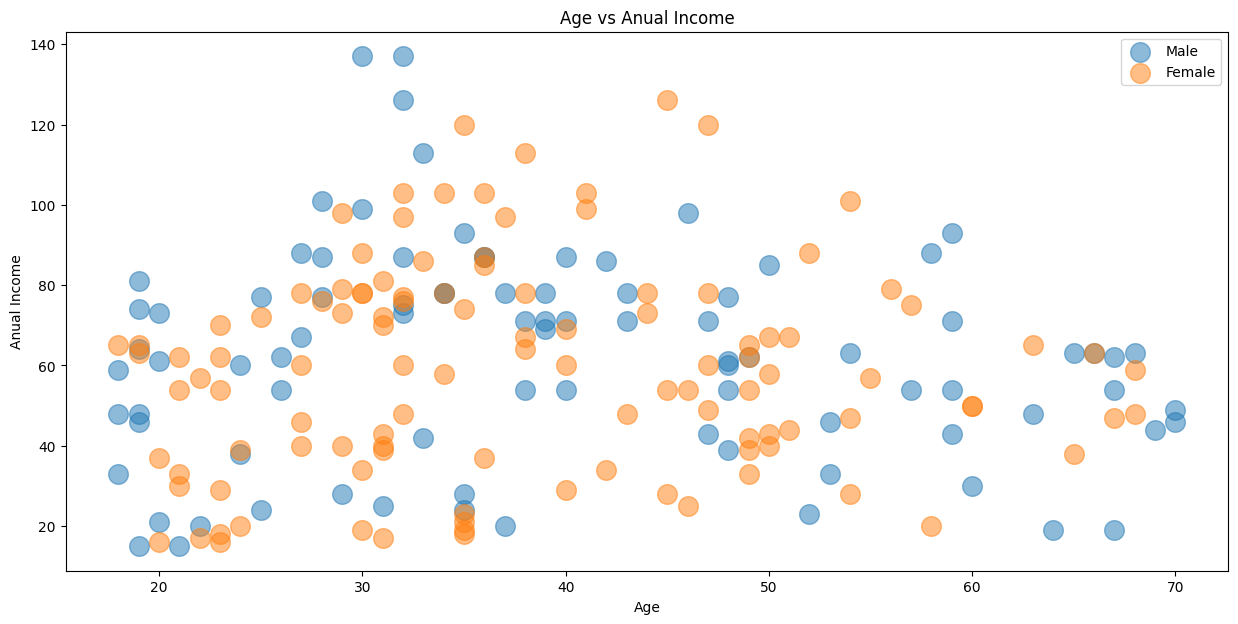

In [37]:
plt.figure(figsize=(15,7))

# Scatter plot for Male
plt.scatter(dataset[dataset['Gender'] == 'Male']['Age'], 
            dataset[dataset['Gender'] == 'Male']['Annual Income (k$)'], 
            s=200, alpha=0.5, label='Male')

# Scatter plot for Female
plt.scatter(dataset[dataset['Gender'] == 'Female']['Age'], 
            dataset[dataset['Gender'] == 'Female']['Annual Income (k$)'], 
            s=200, alpha=0.5, label='Female')

plt.xlabel('Age')
plt.ylabel('Anual Income')
plt.title('Age vs Anual Income')
plt.legend()
plt.show()

# K-Means Clustering

In [38]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [40]:
x=dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [42]:
from sklearn.cluster import KMeans

In [48]:
k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) 
    kmeans.fit(x)
    k.append(kmeans.inertia_)

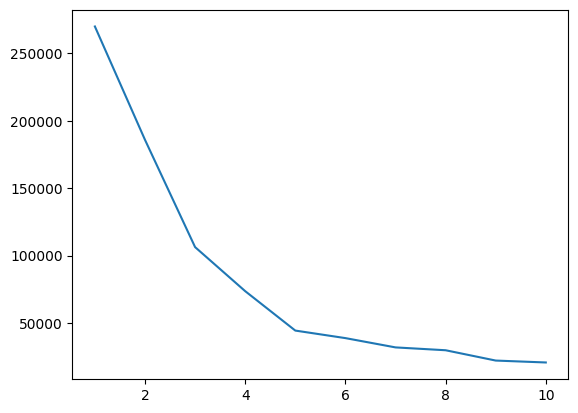

In [49]:
plt.plot(range(1,11),k)
plt.show()

In [51]:
model=KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans=model.fit_predict(x)

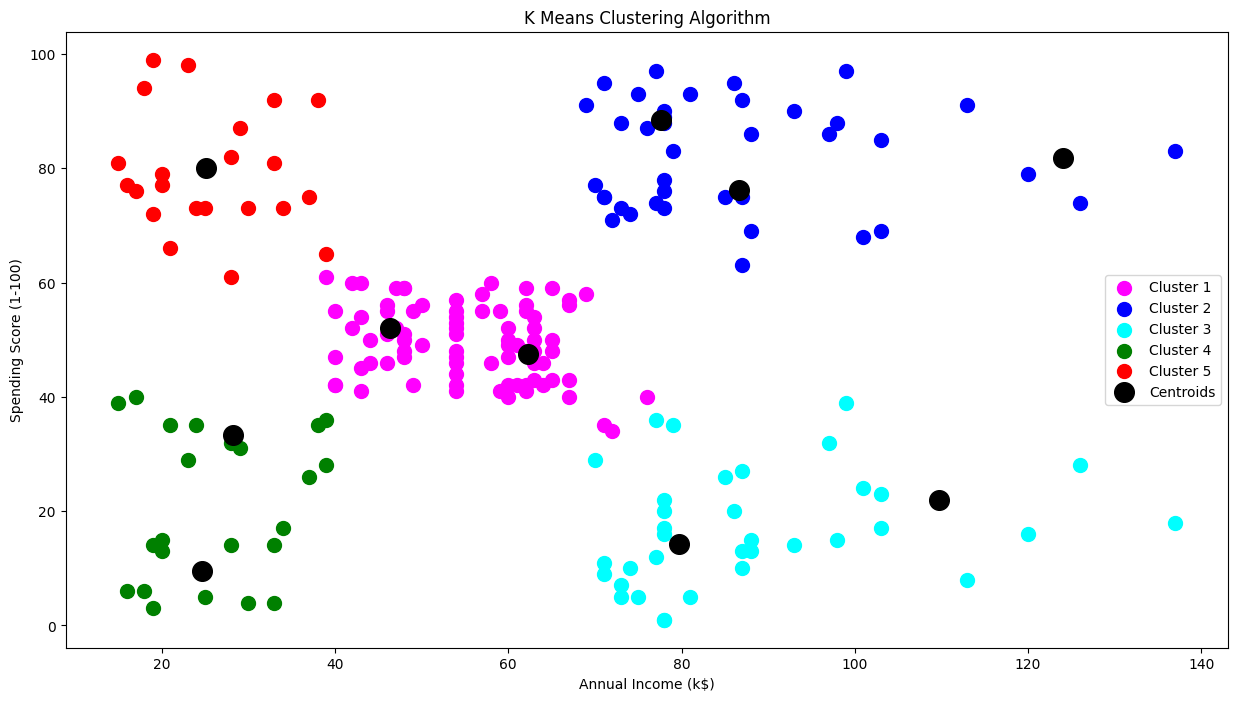

In [54]:


plt.figure(1, figsize=(15, 8))

# Scatter plots for different clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='magenta', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='green', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='red', label='Cluster 5')

# Scatter plot for centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', label='Centroids')

# Titles and labels
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
